# 梯度下降
我们使用梯度下降法求一个线性方程的参数，对于方程 $y=f(x)=\theta_0 + \theta_1x $ ，***y***、***x*** 是已知的（我们收集到的数据），***f*** 是已知的（实际是我们假设的函数模型），$\theta_0、\theta_1$ 是未知的，是我们要求解的目标。

## 梯度下降数学推导

### 设定

> x表示输入变量，称之为特征（features），y表示训练的目标数据（target）

> 一对 $\{x^{(i)},y^{(i)}\}$ 称之为训练样本(training example)  

> 一个m个训练样本的列表 $\{x^{(i)},y^{(i)}; i = 1, \cdots, m\}$ 称之为训练集合(training example)，***m*** 为样本数

> $x^{(i)}、y^{(i)}$中 (***i***) 为上标，不是求幂运算的指数，这种写法沿用广为认知的吴恩达机器学习课程中写法，指训练集合中第 ***i*** 组样本。**要注意 *x* 是一个向量，一组 *x* 可能包含了多个特征，一组 *x* 内的特征用下标表示，这里用 *n* 表示**   

> 假设函数：由于历史原因把预测器称之为假设（hypothesis），假设函数就是预测函数，用 ***h(x)*** 表示

### 假设函数 

$\begin{align}
\large h_\theta(x) & \large = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \theta_0 + \sum\limits_{i=1}^{n} \theta_i x_i \\
\large 为了简化表示，令常数 x_0 & \large = 1 ,则 \\ 
\large h_\theta(x) & \large = \theta_0 \color{red}{x_0} + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \sum\limits_{i=\color{red}{0} }^{n} \theta_i x_i\quad \small \color{gray}{n为输入变量x的数量（不计x_0）,即特征数量} \\
\large & \large = \left[\theta_0, \theta_1, \theta_2, \dots, \theta_n, \right]^T \cdot \left[ x_0,x_1,x_2,\cdots,x_n \right] \small \color{gray}{<=用向量方式表示}\\
\\
\large & \large = {\boldsymbol{\theta}^T} \bf{x} \quad \small \color{gray}{<=此处\theta,x是向量} \\
\end{align}$ 

### 代价函数
代价函数(cost function)用于评估预测值与真实值之间的差距，评估指标有很多，比如标准差、方差、均方误差等。通过**不断调整预测函数的** $\theta$ 以降低误差，当预测值与真实值之间的差距降低到可接受的范围内时，误差收敛，将 $\theta$ 代入预测函数，认为这个函数可以描述样本数据的规律。

这里采用**方差**评估预测效果，<font color="red"> **对于每个（或者说某个）**</font> $\color{red}{\theta}$ ，我们定义一个代价函数 $J(\theta)$ ，***m*** 为样本数：  
$\large \quad J(\theta)=\frac{1}{2} \sum\limits_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 \quad \color{gray}{\small <= \frac{1}{2} 是为了求偏导数后简化等式，不影响代价函数}$  

这个代价函数意义为：将所有样本数据代入假设函数做预测，对于每个（或者说某个） $\theta$，把每个样本的预测值与真实值的方差加和，作为评估预测效果的指标。

### 梯度的数学推导
梯度为代价函数$J(\theta)$求对$\theta$的偏导数:  

$\begin{align}
&\large \frac{\partial J(\theta)}{\partial\theta} \\
\\
\large = & \large \frac{\partial \left(\frac{1}{2} \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 \right)}{\partial \theta} \\
\large = & \large \frac{\partial \Bigg( \frac{1}{2} \big( (h_\theta(x^{(1)}) - y^{(1)})^2 + (h_\theta(x^{(2)}) - y^{(2)})^2 + \dots + (h_\theta(x^{(m)}) - y^{(m)})^2 \big) \Bigg)}{\partial\theta} \small \color{gray}{<=代入h_\theta(x)展开}\\
\\
\large = & \large \frac{\partial \frac{1}{2} (h_\theta(x^{(1)}) - y^{(1)})^2}{\partial \theta} + \frac{\partial \frac{1}{2}  (h_\theta(x^{(2)}) - y^{(2)})^2}{\partial \theta} + \dots + \frac{\partial \frac{1}{2} (h_\theta(x^{(m)}) - y^{(m)})^2}{\partial \theta} \small\color{gray}{<=函数的和差求导法则:} \color{blue}{(u \pm v)^\prime = u^\prime \pm v^\prime} \\
\end{align}$

**对任意一项求偏导数，其他项的类似，设 *j* $\in\{0,\dots,n\}$，则第 *j* 项偏导数如下：**  
  
$\begin{align} 
\large \frac{\partial J(\theta)}{\partial\theta_j} & \large = \frac{\partial \frac{1}{2} (h_\theta(x^{(j)}) - y^{(j)})^2}{\partial \theta_j} \\
\large & \large = \frac{1}{2} \cdot 2 \cdot (h_\theta(x^{(j)}) - y^{(j)})^{2-1} \cdot \frac{ \partial \big(h_\theta (x^{(j)}) - y^{(j)} \big)}{\partial \theta_j} \\
\\
\large & \large = (h_\theta(x^{(j)}) - y^{(j)}) \cdot \frac{ \partial(\theta_0  x^{(j)}_0 + \theta_1 x^{(j)}_1 + \dots + \color{red}{ \theta_j x^{(j)}_j } + \dots + \theta_n x^{(j)}_n - y^j)} {\partial \theta_j} \\
\large & \large = (h_\theta(x^{(j)}) - y^{(j)}) \cdot x^{(j)} \qquad \color{gray}{\small <=除\theta_j x^{(j)}_j外，其他项求偏导时都看作常数，常数求导后为0，\big(\theta_j x^{(j)}\big)^\prime = x^{(j)} }
\end{align}$

$\large \qquad\qquad\qquad \Downarrow$

$\begin{align}
\large \frac{\partial J(\theta)}{\partial\theta} = \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x^{(j)}
\end{align}$

### 梯度更新算法
> 有m个样本

> $j\in\{1,...,m\}$,给 $\theta_j$ 一个随机初始值

> 对于所有 $\theta$，每次一起更新，但使用各自的偏导数计算梯度

> 定义梯度符号为 **∇**，学习速率符号为 **α**，赋值符号为 **:=** 

更新规则：$\large \theta_j := \theta - \alpha \nabla_j $ 

更新算法如下：
            
    loop until 误差收敛 {
            
$\qquad\qquad \theta_j := \theta - \alpha \nabla_j $
                  
    }
    
这种更新算法被称为LMS算法，是由Widrow 和 Hoff在1960年的《Adaptive switching circuits》论文中提出的，这种算法广泛应用于自适应滤波器、自适应模式识别等领域。

LMS算法是一个搜索算法，假设 $\theta$ 从某个给定的初始值开始迭代，逐渐使 $J(\theta)$ 朝着最小的方向变化，直到达到一个值使 $J(\theta)$ 收敛。
> - B.Widrow and M.E.Hoff, “[Adaptive switching circuits](https://www.researchgate.net/publication/230801089_Adaptive_Switching_Circuits),” Proc. Of WESCON Conv. Rec., part 4, pp.96-140, 1960  
> - http://www.ee.cityu.edu.hk/~hcso/it6303_4.pdf
> - http://blog.csdn.net/xiahouzuoxin/article/details/9749689
    
#### 批量梯度更新(batch gradient descent)
批量梯度更新时，使用全量样本数据计算梯度：$\large \nabla_j = \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j$  

更新算法如下：
            
    loop until 误差收敛 {
            
$\qquad\quad \theta_j := \theta_j - \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j $
                  
    }

每更新一次梯度，仅为了得到梯度都需要计算 m 次偏导数，导致当 m 非常大时，此算法带来非常大的计算量，导致需要很长时间才能得到结果。

#### 随机梯度更新(stochastic gradient descent)

> 为什么这里随机用stochastic，不用random，请看知乎[「Stochastic」与「Random」有何区别？](https://www.zhihu.com/question/20675303)

随机梯度更新时，循环 m 次，每循环一次，计算一次梯度，只需要计算当前样本的偏导数即可：$\large \nabla_j = h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j $

更新算法如下：
            
    loop until 误差收敛 {
        loop i=1 to m {   
$\qquad\qquad\quad \theta_j := \theta_j - h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j $  

        }          
    }
    
每更新一次梯度，只需要计算一次，当循环 m 次时，已经更新了 m 次梯度，相比批量梯度更新，此算法计算量相对较小，可以较早到达收敛区间。

## 代码演示梯度下降求参数

### 生成样例数据
有在 $y=2x_1 + \frac{1}{2}x_2^2$ 上的点集，生成点数据代码如下:   

In [9]:
# 特征数据
x_train = [(1.0,3.0), (2.0, 4.0), (3.0, 5.0), (5.0,9.0), (8.0, 10.0)]
# 真实值
y_train = []
for x in x_train:
    y_train.append(2*x[0] + ((x[1] ** 2))/2.0)

### 显示样例数据

In [10]:
# 显示数据    
data = zip(x_train, y_train)
print "x1      x2   y"
for d in data:
    print d

x1      x2   y
((1.0, 3.0), 6.5)
((2.0, 4.0), 12.0)
((3.0, 5.0), 18.5)
((5.0, 9.0), 50.5)
((8.0, 10.0), 66.0)


### 定义假设函数  
假定我们已知函数的模型为 $h(x) = \theta_0 x_1 + \theta_1 x_2^2$ ，但不知参数 $\theta_0$ 、$\theta_1$: 

In [11]:
def h(x, ** params):
    theta_0 = params['theta_0']
    theta_1 = params['theta_1']
    return theta_0 * x[0] + theta_1 * (x[1] ** 2)

### 定义代价函数
$J(\theta)=\frac{1}{2} \sum \limits_{i=0}^{m}(h(x^{i})-y^{(i)})^2$

### 定义梯度
对任意一项 $\theta_j$ 代价函数求偏导数：  
$\large \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{2} \cdot 2 \cdot (h(x^{i})-y^{(i)}) \cdot \frac{\partial (\theta_0 x_1^{(i)} + \theta_1 (x_2^{(i)})^2 - y^{(i)})}{\partial \theta_j} = (h(x^{i})-y^{(i)}) \frac{\partial (\theta_0 x_1^{(i)} + \theta_1 (x_2^{(i)})^2 - y^{(i)})}{\partial \theta_j}$

此处由于 $x_1$ 、$x_2$ 的指数不一样，所以分别求偏导：

$\large \frac{\partial J(\theta)}{\partial \theta_0} = (h(x^{i})-y^{(i)}) x_1^{(i)}$  

$\large \frac{\partial J(\theta)}{\partial \theta_1} = (h(x^{i})-y^{(i)}) (x_2^{(i)})^2$  


### 批量梯度更新

In [1]:
def batch_gradient_update(x_train, y_train, hf, ** params):
    delta_0 = 0.0
    delta_1 = 0.0
    theta_0 = params['theta_0']
    theta_1 = params['theta_1']
    alpha = params['learning_rate']
    for i, x in enumerate(x_train):
        delta = alpha * (y_train[i] - hf(x, ** params))
        delta_0 += delta * x[0]
        delta_1 += delta * (x[1] ** 2)
    
    theta_0 -= delta_0 * params['flag']
    theta_1 -= delta_1 * params['flag']
    #print "delta={} delta_0={} delta_1={}".format(delta, delta_0, delta_1)
    return {'theta_0':theta_0, 'theta_1': theta_1}

### 随机梯度更新

In [2]:
def stochastic_gradient_update(x_train, y_train, hf, ** params):
    def circular_locate(times, length):
        '''环形方式计算下标，times超过length时，则回到头部重新开始计数'''
        return times % length if(times < length) else times - int(times/length)*5

    delta_0 = 0.0
    delta_1 = 0.0
    theta_0 = params['theta_0']
    theta_1 = params['theta_1']
    alpha = params['learning_rate']
    i = circular_locate(params['times'], len(x_train))
    x = x_train[i]
    delta = alpha * (y_train[i] - hf(x, ** params))
    delta_0 += delta * x[0]
    delta_1 += delta * (x[1] ** 2)
    
    theta_0 -= delta_0 * params['flag']
    theta_1 -= delta_1 * params['flag']
    #print "delta={} delta_0={} delta_1={}".format(delta, delta_0, delta_1)
    return {'theta_0':theta_0, 'theta_1': theta_1}

### 误差函数

In [3]:
def squared_error(x_train, y_train, hf, ** params):
    error = 0.0
    for i, x in enumerate(x_train):
        error += (y_train[i] - hf(x, ** params)) ** 2
    return error

### 梯度下降主框架

In [4]:
def gradient_descent(x_train, y_train, gdf, hf, ef, stop_condition,** params):
    times = 1
    
    def init_real_params(params, times, flag=1.0):
        real_params = params.copy()
        real_params['flag'] = flag
        real_params['times'] = times
        return real_params
    
    real_params = init_real_params(params, times)
    
    #保留最近一次error
    last_error = None
    #保留最近一次 real_params
    last_params = None
    #智能修正次数
    smart_correction_times = 0
    #记录变化数据
    logs = {'times':[], 'error':[], 'params':[]}
    while(True):        
        error = ef(x_train, y_train, hf, ** real_params)
        if(error < stop_condition['accept_error']):
            #print "found parameters. error={:.8f} times={} smart_correction_times={}".format(
            #    error, times, smart_correction_times)
            break
        if(times > stop_condition['max_times']):
            print "reach max times. times = {}".format(times)
            return None
        
        params_updated = gdf(x_train, y_train, hf, ** real_params)
        #print "times = {} error={:.2f} params_updated = {}".format(times, error, str(params_updated))
        
        # 智能修正
        # 当error越来越大时，反方向更新梯度，并重置参数为最近一次参数（还可以减缓学习速率？）
        if(last_error != None and error > last_error):            
            smart_correction_times += 1
            #print "smart correction. last_error={:.8f} error={:.8f}".format(last_error, error)
            #反转符号极性（决定梯度的更新操作是加还减），并使用上一次的参数
            real_params = init_real_params(last_params, times, -1)
        else:
            # 更新参数
            real_params.update(params_updated)
            real_params['times'] = times
            last_params = real_params.copy()
            
        # 记录本次error
        last_error = error
        # 记录日志
        logs['times'].append(times)
        logs['error'].append(error)
        logs['params'].append(real_params)
        
        times += 1
        
    del real_params['times']
    return {
                'alg_name': gdf.__name__,
                'performance': {'times':times, 'error':error, 'smart_correction_times': smart_correction_times}, 
                'params': real_params, 
                'logs': logs
           }

### 程序入口

In [12]:
theta_0 = 0.1
theta_1 = 0.1
gradient_descent_algorithms = [batch_gradient_update, stochastic_gradient_update]
out_data = []
for alg in gradient_descent_algorithms:
    # 输出分割线
    print "{:=^50s}".format(" " + alg.__name__ + " ")
    
    out = gradient_descent(x_train, y_train, alg, h, squared_error, 
    {'max_times':1000000, 'accept_error': 0.0001}, 
    theta_0=theta_0, theta_1=theta_1, learning_rate = 0.0001)
    
    out_data.append(out)
    print out['params']
    print out['performance']
    print ""

============= batch_gradient_update ==============
{'flag': -1, 'theta_0': 1.9945897310077012, 'theta_1': 0.500407941007894, 'learning_rate': 0.0001}
{'error': 9.993881974485101e-05, 'smart_correction_times': 1, 'times': 17202}

=========== stochastic_gradient_update ===========
{'flag': -1, 'theta_0': 1.9948595782513392, 'theta_1': 0.5004111433971709, 'learning_rate': 0.0001}
{'error': 9.999778836495766e-05, 'smart_correction_times': 110569, 'times': 276426}



### 绘制静态图形

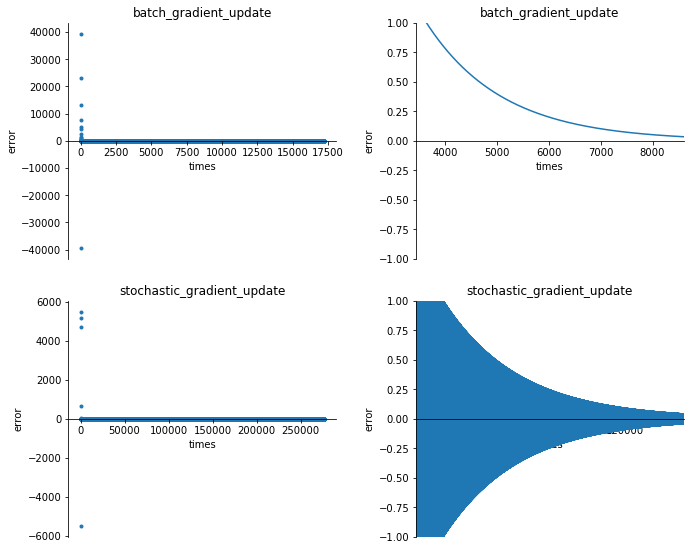

In [13]:
import matplotlib.pyplot as plt
from IPython.display import display 

def move_axis(y_axis_base = 0, x_axis_base=0):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    if(y_axis_base != None):
        ax.spines['bottom'].set_position(('data',y_axis_base))
    ax.yaxis.set_ticks_position('left')
    if(x_axis_base != None):
        ax.spines['left'].set_position(('data',x_axis_base))

fig = plt.figure(1,figsize=(10,8))

def draw_plot(ax, plot_type, xlim=None, ylim=None, **kwargs):
    logs = data['logs']
    X, Y = logs['times'], logs['error']
    for i,y in enumerate(Y):
        if(i > 0 and y > abs(Y[i - 1])):
            Y[i] *= -1.0
    if(plot_type == 'scatter'):   
        ax.scatter(X, Y, label=data['alg_name'], **kwargs)
    if(plot_type == 'plot'):
        ax.plot(X, Y, label=data['alg_name'], **kwargs)
    ax.set_ylabel('error')  
    ax.set_xlabel('times') 
    ax.set_title(data['alg_name'])
    
    ax.figure.set_figwidth(10)
    ax.figure.set_figheight(8)
    
    if(ylim !=None):
        ax.set_ylim(* ylim) 
    if(xlim !=None):
        ax.set_xlim(* xlim) 
        
for i, data in enumerate(out_data):
    ax = fig.add_subplot(221 + i * 2)
    draw_plot(ax, 'scatter', marker='.')
    move_axis(x_axis_base = None)
    
    ax = fig.add_subplot(221 + i * 2 + 1)
    times = data['performance']['times']
    xlim_max = times/2
    xlim_min = times/5
    draw_plot(ax, 'plot',xlim=[xlim_min, xlim_max], ylim=[-1,1]) 
    move_axis(x_axis_base = None)

plt.tight_layout(2)
plt.show()

### 绘制交互图形
数据量大，绘制较慢，结果太大，无法保存，如需要可以直接运行

In [ ]:
import bokeh.plotting as bk_plot
import bokeh.models as bk_models
from bokeh.models.formatters import BasicTickFormatter

bk_plot.output_notebook()

In [ ]:
p = bk_plot.figure(plot_width=800, title="批量梯度下降和随机梯度下降错误曲线", 
                   tools=['pan', 'box_zoom', 'wheel_zoom', 'zoom_in', 'zoom_out','undo', 'redo', 'reset', 'save'])
colors = {"batch_gradient_update": 'red', "stochastic_gradient_update": 'green'}
for data in out_data:
    alg_name = data['alg_name']
    times = data['logs']['times']
    error = data['logs']['error']
    params = data['logs']['params']
    theta_0, theta_1 = [], []    
    x_gt1, y_gt1 = [], []

    for i,e in enumerate(params):
        param = params[i]
        theta_0.append(param['theta_0'])
        theta_1.append(param['theta_1'])
        
        if(error[i] > 1):
            x_gt1.append(times[i]) 
            y_gt1.append(e)
    
    hover = bk_models.tools.HoverTool(
        tooltips=[
                ("times", "@x{0}"),
                ("error", "@y{0.8f}"),
                ("theta_0", "@theta_0"),
                ("theta_1", "@theta_1"),
            ]
    )
    ds = bk_models.ColumnDataSource(
        data={'x': times, 'y': error, 'theta_0': theta_0, 'theta_1': theta_1}
    )
    p.line('x','y', source=ds, legend=alg_name, color=colors[alg_name]) 
            
    #error大于1的用点标记出来
    p.circle(x_gt1, y_gt1, color=colors[alg_name])
    
p.add_tools(hover)  
p.xaxis.axis_label = "更新次数"
p.yaxis.axis_label = "error"
p.xaxis.formatter = BasicTickFormatter(use_scientific=False)
bk_plot.show(p)